## **Business Acknowledge**

## **Context**

Sebuah perusahaan yang bergerak di bidang rental(sewa-pinjam) DVD Internasional ingin mengetahui gambaran umum tentang data pelanggan yang menggunakan jasa dan produk mereka. Terdapat sebuah database yang menunjukkan detail dari data barang (DVD), data proses rental, data penjualan, data pelanggan, data staff, dan data toko. perusahaan ingin bisa mendapatkan insight yang dapat dijalankan, sehingga nantinya mereka dapat melakukan penerapan strategi yang tepat sasaran untuk mempertahankan pelanggan dan menambah jumlah pelanggan melalui peningkatan kualitas pelayanan jasa & produk bisnis (customer needs - customer services).

## **Database Information**

Sumber Database: https://downloads.mysql.com/docs/sakila-db.zip

Database yang dimiliki mempunyai 23 tabel (16 Tabel data dan 7 Tabel virtual), yaitu:
- Actor        : Menyimpan informasi tentang daftar data semua aktor.
- Actor_info   : Menyimpan informasi tentang data semua aktor beserta detail film yang dibintangi.
- Address      : Menyimpan informasi tentang alamat pelanggan, staff, dan toko.
- Category     : Menyimpan informasi kategori yang dapat ditetapkan ke film.
- City         : Menyimpan informasi tentang daftar kota.
- Country      : Menyimpan informasi tentang daftar negara.
- Customer     : Menyimpan informasi tentang daftar akun semua pelanggan.
- Customer_list: Menyimpan informasi tentang detail data semua pelanggan.
- Film         : Menyimpan informasi tentang karakteristik setiap film beserta data administratifnya.
- Film_actor   : Menyimpan informasi tentang hubungan antara film dan aktor. Untuk setiap aktor dalam film tertentu, akan terdapat satu baris dalam tabel yang mencantumkan aktor dan film yang diperankan.
- Film_category : Menyimpan informasi tentang hubungan antara film dan kategori filmnya.
- Film_list    : Menyimpan informasi tentang daftar data seluruh film.
- Film_text    : Menyimpan informasi tentang data deskripsi setiap film.
- Inventory    : Menyimpan informasi tentang salinan film tertentu di toko tertentu.
- Language     : Menyimpan informasi tentang daftar bahasa yang digunakan dalam film.
- Nicer_but_slower_film_list : Menyimpan informasi tentang jenis data film dengan penambahan data aktor yang membintangi film.
- Payment      : Menyimpan informasi tentang catatan setiap pembayaran yang dilakukan oleh pelanggan.
- Rental       : Menyimpan informasi tentang penyewaan setiap item(DVD) dengan informasi tentang penyewa, barang yang disewa, dan waktu sewa.
- Sales_by_film_category : Menyimpan informasi tentang jumlah sewa setiap kategori film.
- Sales_by_store : Menyimpan informasi tentang jumlah sewa setiap toko.
- Staff       : Menyimpan informasi semua anggota staff, termasuk informasi email, informasi waktu login.
- Staff_list  : Menyimpan informasi tentang daftar semua anggota staf, termasuk alamat dan informasi toko.
- Store       : Menyimpan informasi tentang data toko.

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.


## **Connecting To Database**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database ``sakila``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.

In [1]:
# Import Modules

import pandas as pd
import numpy as np
import mysql.connector as sqlcon

In [2]:
# Connect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'rogicka',
    passwd = '*******',
    database = 'sakila'
)

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan ``query`` yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil ``query`` yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data. Nantinya, di sini terdapat 2 query untuk mengambil data-data yang ada di database, bukan hanya berasal dari 1 tabel, tapi juga akan melibatkan hubungan antar tabel.

In [3]:
# Query Function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

## **Data Detail Pelanggan**

Data pertama ini merupakan data utama yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 5 tabel, yaitu tabel ```Costumer```, ```Customer_list```,```Payment```, ```address``` dan ```Rental```. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah :
- ID dari tabel customer_list
- name dari tabel customer_list
- country dari tabel customer_list
- country dari tabel address
- amount dari tabel payment
- rental_id dari tabel rental

Selain dari tabel, terdapat sebuah kolom juga yang dinamakan Total_rental yang merupakan banyaknya sewa yang dilakukan oleh tiap pelanggan; kolom rerata_sewa yang merupakan rata-rata harga sewa yang dibayarkan oleh customer di setiap sewa nya.

Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya.

In [4]:
# Query 1

tabel1 = sql_table (
    '''
select ID, name, customer_list.country, count(rental.rental_id) as total_rental, avg(amount) as avg_price, country.country as store_location
from customer_list
left join customer on customer_list.ID = customer.customer_id
left join rental on customer_list.ID = rental.customer_id
left join payment on customer_list.ID = payment.customer_id
left join address on customer_list.SID = address.address_id
left join city on address.city_ID = city.city_ID
left join country on country.country_ID = city.country_ID
where payment.rental_id = rental.rental_id 
group by id;
    '''
)
tabel1

,ID,name,country,total_rental,avg_price,store_location
0,1,MARY SMITH,Japan,32,3.708750,Canada
1,2,PATRICIA JOHNSON,United States,27,4.767778,Canada
2,3,LINDA WILLIAMS,Greece,26,5.220769,Canada
3,4,BARBARA JONES,Myanmar,22,3.717273,Australia
4,5,ELIZABETH BROWN,Taiwan,38,3.805789,Canada
...,...,...,...,...,...,...
594,595,TERRENCE GUNDERSON,China,30,3.923333,Canada
595,596,ENRIQUE FORSYTHE,Greece,28,3.454286,Canada
596,597,FREDDIE DUGGAN,Peru,25,3.990000,Canada
597,598,WADE DELVALLE,Switzerland,22,3.808182,Canada


# **DATA MANIPULATION**

Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada ```tabel1```. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

## **DATA ANOMALIES**

In [5]:
# Check Info Tabel1

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              599 non-null    int64 
 1   name            599 non-null    object
 2   country         599 non-null    object
 3   total_rental    599 non-null    int64 
 4   avg_price       599 non-null    object
 5   store_location  599 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


### **Melihat Data Sekilas Dari General Info**

Dari General Info tabel di atas, terlihat bahwa secara keseluruhan terdapat 599 baris data dengan total 6 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda, yaitu object dan integer. Jika melihat dari informasi di atas didapati bahwa seluruh data pada kolom terisi atau dapat disebut tidak memiliki missing value, sehingga tidak perlu dilakukan pengecekan missing value. Hal ini terjadi dikarenakan data yang diakses melalui database terdapat kondisi batas dengan query ``where payment.rental_id = rental.rental_id `` sehingga data yang hanya tersaji merupakan data yang memenuhi kondisi batas tersebut. Dengan kata lain data yang digunakan telah dilakukan cleaning sebelumnya melalui query pada SQL, ini menunjukkan bahwa data yang tidak termasuk ke dalam tabel telah diasumsikan tidak berpengaruh secara signifikan. **Kesimpulan pertama adalah bahwa tidak terdapat *missing value*.**


## **Check Missing Value**
Untuk membuktikan bahwa tidak terdapat `missing value` kita perlu melakukan pengecekan:

In [6]:
# Check Missing Value Percentage

tabel1.isnull().sum()

ID                0
name              0
country           0
total_rental      0
avg_price         0
store_location    0
dtype: int64

Fokus berikutnya adalah pada tipe data fitur ``avg_price`` yang tipe awal datanya merupakan object sehingga tidak sesuai kebutuhan. **Kesimpulan kedua adalah terdapat fitur yang tipe datanya salah dan harus diubah sesuai dengan tipe data seharusnya.**

## **Mengubah Tipe Data Yang Salah**

Proses berikutnya merupakan mengubah tipe data pada fitur yang salah, dalam hal ini fitur ``avg_price`` memiliki tipe data object yang seharusnya merupakan tipe data float.

In [7]:
tabel1['avg_price'] = pd.to_numeric(tabel1['avg_price'])

In [8]:
## Recheck info
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              599 non-null    int64  
 1   name            599 non-null    object 
 2   country         599 non-null    object 
 3   total_rental    599 non-null    int64  
 4   avg_price       599 non-null    float64
 5   store_location  599 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 28.2+ KB


In [9]:
# Check Dupliacate

tabel1[tabel1.duplicated()]

,ID,name,country,total_rental,avg_price,store_location


### **Data Duplicate**

Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja. Untuk data saat ini, melihat output di atas artinya tidak terdapat data yang duplikat. Dengan begitu tidak perlu ada action yang dilakukan.

## **Preview Cleaned Data**

Setelah semua anomalies sudah diselesaikan, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses sebelumnya.

In [10]:
tabel1.sample(20)

,ID,name,country,total_rental,avg_price,store_location
114,115,WENDY HARRISON,Mexico,30,3.056667,Canada
25,26,JESSICA HALL,Holy See (Vatican City State),34,4.490000,Australia
184,185,ROBERTA HARPER,Iran,23,3.685652,Canada
79,80,MARILYN ROSS,Nigeria,30,4.590000,Canada
389,390,SHAWN HEATON,Thailand,33,4.626364,Canada
200,201,VICKI FIELDS,Germany,25,4.350000,Canada
151,152,ALICIA MILLS,India,21,3.990000,Canada
593,594,EDUARDO HIATT,China,27,4.841852,Canada
51,52,JULIE SANCHEZ,Spain,29,3.714138,Canada
534,535,JAVIER ELROD,Chad,32,4.240000,Canada


### **General Info Cleaned Data**

In [11]:
# Check Some Info

listItem = []
for col in tabel1.columns :
    listItem.append([col, tabel1[col].dtype, len(tabel1),tabel1[col].isna().sum(), round((tabel1[col].isna().sum()/len(tabel1[col])) * 100,2),
                    tabel1[col].nunique(), list(tabel1[col].drop_duplicates().sample(2).values)])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,ID,int64,599,0,0.0,599,"[111, 216]"
1,name,object,599,0,0.0,599,"[ERIKA PENA, ANTHONY SCHWAB]"
2,country,object,599,0,0.0,108,"[Sri Lanka, Kuwait]"
3,total_rental,int64,599,0,0.0,32,"[24, 18]"
4,avg_price,float64,599,0,0.0,361,"[4.308182, 4.031667]"
5,store_location,object,599,0,0.0,2,"[Canada, Australia]"


## **DATA OUTLIERS**

In [12]:
# total_rental Outlier Check With Function

Q1_amount = tabel1['total_rental'].describe()['25%']
Q3_amount = tabel1['total_rental'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = tabel1[(tabel1['total_rental'] < Q1_amount - (1.5 * iqr)) | (tabel1['total_rental']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = tabel1[(tabel1['total_rental'] > Q1_amount - (1.5 * iqr)) & (tabel1['total_rental']< Q3_amount + (1.5 * iqr)) ].index
tabel1.loc[outlier_index]

,ID,name,country,total_rental,avg_price,store_location
74,75,TAMMY SANDERS,Taiwan,41,3.794878,Australia
143,144,CLARA SHAW,Belarus,42,4.656667,Canada
147,148,ELEANOR HUNT,Runion,46,4.707391,Canada
235,236,MARCIA DEAN,Philippines,42,4.180476,Canada
317,318,BRIAN WYMAN,Poland,12,4.406667,Canada
525,526,KARL SEAL,United States,45,4.923333,Australia


In [13]:
# avg_price Outlier Check With Function

Q1_amount = tabel1['avg_price'].describe()['25%']
Q3_amount = tabel1['avg_price'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = tabel1[(tabel1['avg_price'] < Q1_amount - (1.5 * iqr)) | (tabel1['avg_price']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = tabel1[(tabel1['avg_price'] > Q1_amount - (1.5 * iqr)) & (tabel1['avg_price']< Q3_amount + (1.5 * iqr)) ].index
tabel1.loc[outlier_index]

,ID,name,country,total_rental,avg_price,store_location
186,187,BRITTANY RILEY,Ukraine,28,5.704286,Australia


Terdapat outliers untuk kedua fitur `total_rental` dan `avg_price`. Namun data outliers ini tidak dihapus dan tetap digunakan untuk analisis berikutnya.

### ***DATA VISUALIZATION & STATISTICS***

Untuk Data Visualization, saya menggunakan tools Tableau Public untuk mendukung dan membantu analisa. Alasannya karena Tableau dapat digunakan dengan praktis dan dapat membangkitkan koordinat geografik yang nantinya digunakan untuk analisis Heat Map.

## **TOP 10 CUSTOMER**


In [14]:
tabel1['total_rental'].describe()

count    599.000000
mean      26.784641
std        5.110357
min       12.000000
25%       23.000000
50%       26.000000
75%       30.000000
max       46.000000
Name: total_rental, dtype: float64

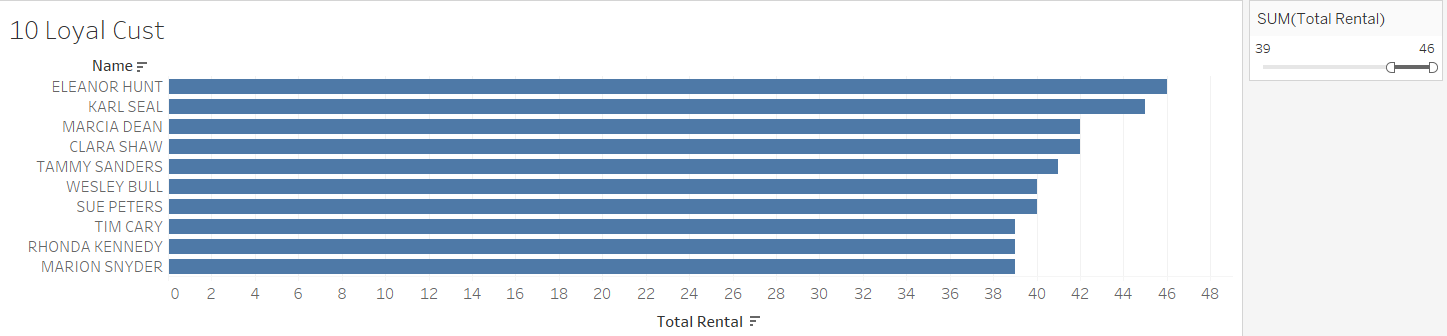

Menurut Edward Gotham seperti dikutip ***Tallyfy***, 25%-40% dari total pendapatan perusahaan biasanya berasal dari pelanggan yang sudah ada. Dari *statement* tersebut, kita bisa melihat bahwa pelanggan lama memiliki peran penting bagi sebuah bisnis. Oleh karena itu, berdasarkan grafik di atas, perusahaan dapat memberi apresiasi berupa penawaran spesial bagi pelanggan atas loyalitasnya. Hal ini dapat bertujuan untuk mempertahankan pelanggan agar tetap membeli produk/jasa, dan juga dapat meningkatkan minat/kemauan pelanggan lain atau bahkan pelanggan baru untuk bisa mendapatkan penawaran spesial dengan membeli produk/jasa sebanyak-banyaknya. 

## **HEATMAP NEGARA ASAL PELANGGAN**

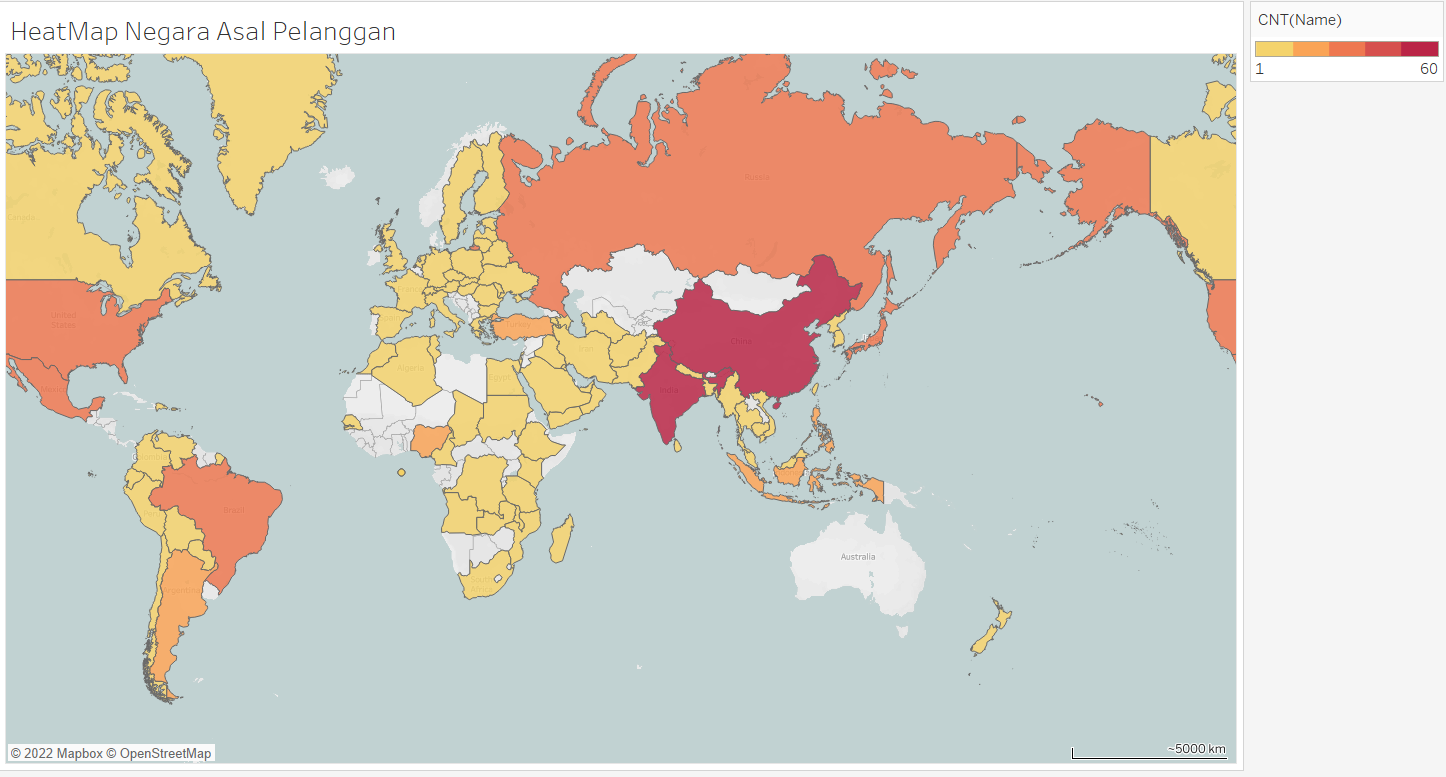

Dari grafik di atas kita dapat melihat bahwa cakupan pelanggan sudah hampir mencapai seluruh negara di dunia. Namun ada hal menarik dari grafik tersebut, karena salah satu lokasi bisnis terletak di negara Australia, namun tidak ada pelanggan yang berasal dari negara tersebut.

## **10 NEGARA PELANGGAN TERATAS**

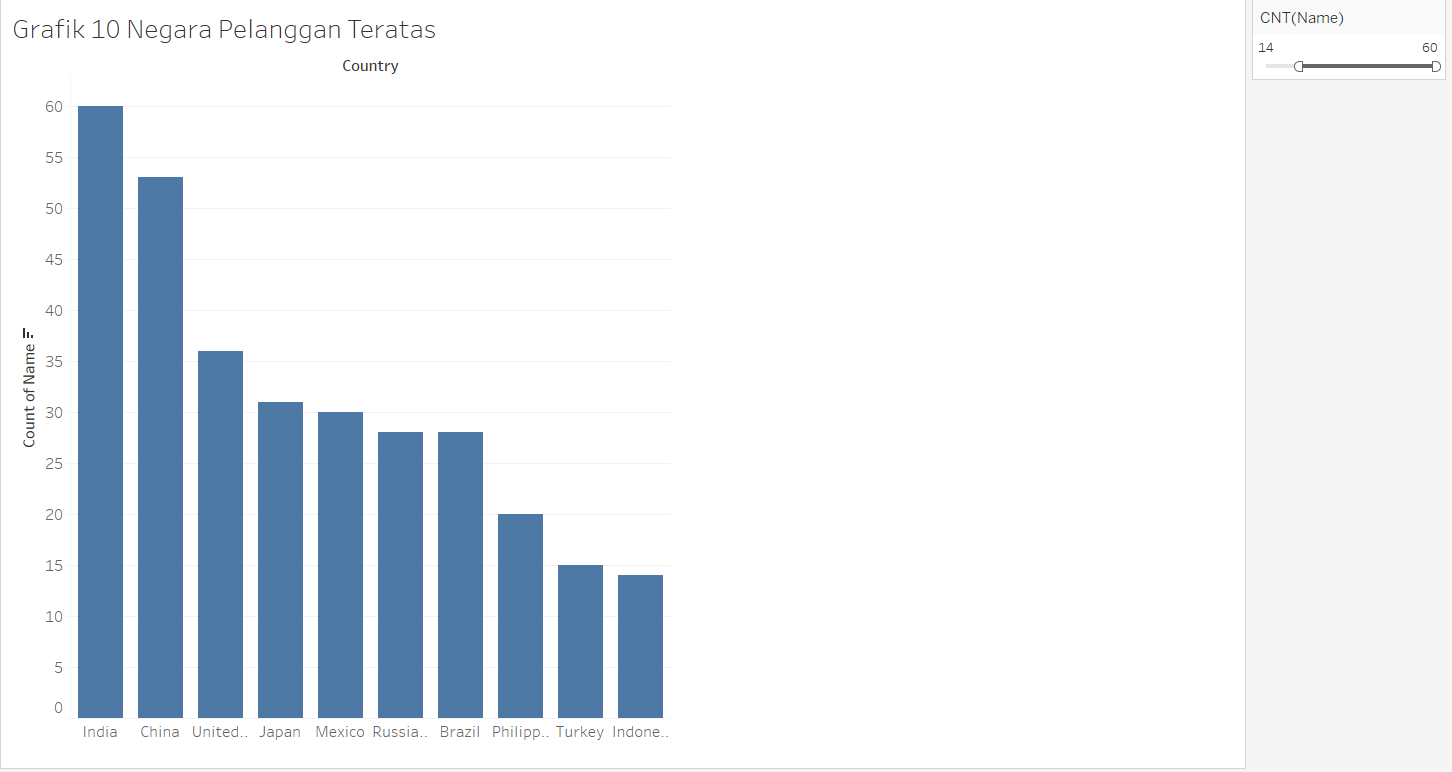

Salah satu strategi bisnis dalam meningkatkan kualitas produk/jasa adalah pemilihan lokasi usaha. Dari grafik di atas, kita dapat melihat 10 negara dengan pelanggan terbanyak. Sedangkan berdasarkan pengamatan, negara teratas, India `(60 pelanggan)`, merupakan negara yang lokasinya jauh dari negara lokasi usaha (Kanada dan Australia).

### **PERBEDAAN RATA-RATA HARGA SEWA TIAP TOKO**

In [15]:
# Uji Perbandingan Nilai Rata-rata harga sewa Antar Setiap Pelanggan (Normalitas)

from scipy.stats import shapiro

norm, pval = shapiro(tabel1['avg_price'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUSI NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUSI NORMAL')

Gagal Tolak H0 Karena P-Value (0.7670206427574158 > 5%)
DATA BERDISTRIBUSI NORMAL


In [16]:
# Uji perbandingan Nilai Rata-rata harga sewa dengan representative pelanggan dari 10 negara dengan pelanggan terbanyak
from scipy.stats import ttest_ind
krus, pvttest = ttest_ind(tabel1[tabel1['store_location'] == 'Canada']['avg_price'],
                          tabel1[tabel1['store_location'] == 'Australia']['avg_price'],
                        equal_var = True)

if pvttest < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pvttest} < 5%)')
    print ('Terdapat Perbedaan Nilai Mean Harga Sewa pada Setiap Toko Yang Ada')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pvttest} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Mean Harga Sewa pada Setiap Toko Yang Ada')

Gagal Tolak H0 Karena P-Value (0.07279336544570186 > 5%)
Tidak Terdapat Perbedaan Nilai Mean Harga Sewa pada Setiap Toko Yang Ada


### **HUBUNGAN TOTAL SEWA DAN RERATA HARGA SEWA**

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

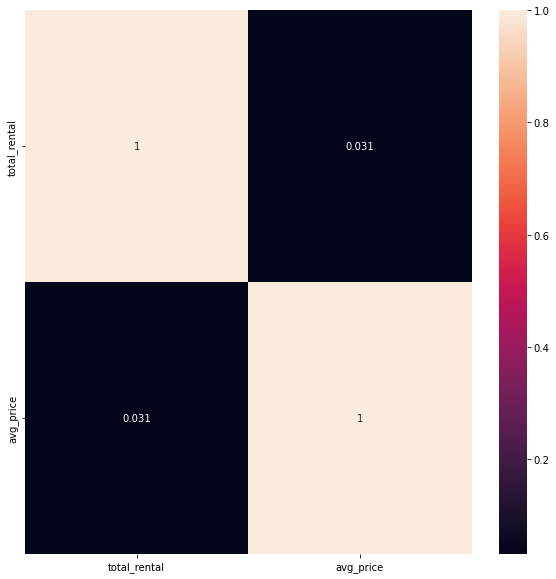

In [18]:
# Korelasi

plt.figure(figsize=(10,10))
sns.heatmap(tabel1[['total_rental', 'avg_price']].corr('pearson'), annot=True)
	

Dari Uji test korelasi di atas, dapat dilihat bahwa fitur `total_rental` dan `avg_price` berkorelasi positif namun tidak memiliki korelasi yang kuat.

### **KESIMPULAN**

**1**. Data total sewa setiap pelanggan memperlihatkan bahwa setiap pelanggan melakukan sewa dengan variasi `(12-46)` total sewa, dengan rata-rata `26` total sewa setiap pelanggannya. 
**Rekomendasi** : Memberikan penawaran spesial kepada pelanggan loyal. Dapat berupa diskon, voucher, dsb. untuk top 5 pelanggan, atau setiap melakukan 40 total sewa.
- ``pros`` : Dapat Mempertahankan pelanggan lama, bahkan menarik peminat pelanggan baru.
- ``cons`` : Tambahan biaya untuk melakukan program.

**2.** Secara keseluruhan pelanggan berasal hampir meliputi seluruh negara di dunia.
**Rekomendasi** : Melakukan pemasaran untuk mendapatkan pelanggan dari negara-negara lain yang tidak terdapat dalam daftar.
- ``pros`` : Memungkinkan penambahan pelanggan baru dari negara lain yang tidak masuk ke dalam daftar.
- ``cons`` : Strategi ini butuh riset lanjutan untuk mengetahui preferensi calon pelanggan terhadap bisnis usaha sewa DVD di negara-negara tertentu.

**3.** Terdapat data jumlah sewa berdasarkan asal negara pelanggan yang signifikan.
**Rekomendasi** : Membuka toko baru di sekitar negara yang banyak peminat untuk menaikkan tingkat kepuasan pelanggan.
- ``pros`` : Memudahkan pelanggan dalam proses sewa-pinjam dvd termasuk dalam hal complain apabila terjadi kesalahan proses sewa.
-``cons`` : Membutuhkan biaya dalam merealisasikannya.

**4.** Tidak terdapat perbedaan Rata-rata harga sewa di setiap toko (lokasi: Australia dan Canada).

**5.** Tidak ada hubungan yang kuat antara total sewa yang dilakukan pelanggan terhadap harga sewa yang dibayarkan oleh pelanggan (0.031)